In [7]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import shapiro, kstest



pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('hr_raw_data_v2.csv')

In [9]:
df.columns

Index(['employee_number', 'gender', 'birth_year', 'age', 'marital_status',
       'dist_home', 'job_title', 'department', 'departured', 'year_at_comp',
       'standard_hours', 'remote', 'business_travel', 'over_time', 'job_level',
       'stock_opt_level', 'traning_times_last_year', 'perf_rate',
       'year_last_promotion', 'year_current_mngr', 'education_field',
       'education_scale', 'annual_salary', 'monthly_income', 'daily_rate',
       'perc_salary_hike', 'env_sat_rate', 'job_involvement', 'job_sat_rate',
       'relationship_sat_rate', 'work_life_balance', 'num_comp_worked',
       'tot_working_year'],
      dtype='object')

In [10]:
df['education_scale'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [11]:
edad con satisfacción
salario con satisfacción
tipo jornada con satisfacción
departamento con satisfacción (muchos son unknown)


SyntaxError: invalid syntax (3774339386.py, line 1)

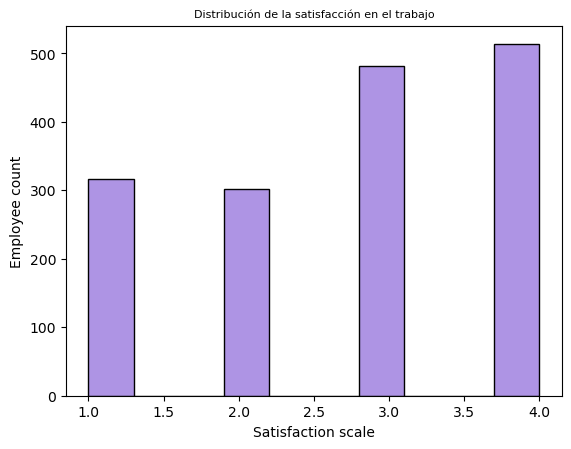

In [12]:
sns.histplot(data=df, x='job_sat_rate', bins=10, kde=False, color='mediumpurple')
plt.title('Distribución de la satisfacción en el trabajo', fontsize = 8)
plt.xlabel('Satisfaction scale')
plt.ylabel('Employee count');

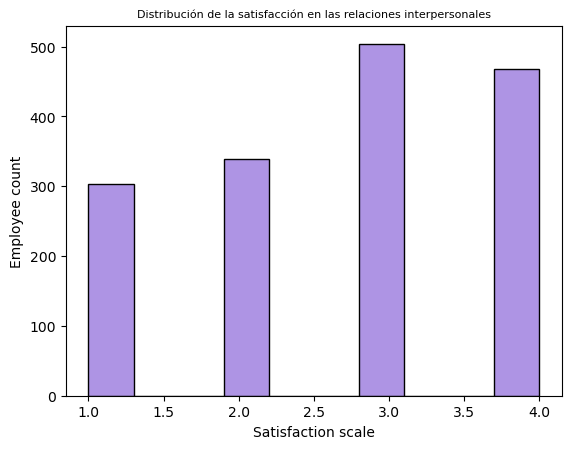

In [13]:
sns.histplot(data=df, x='relationship_sat_rate', bins=10, kde=False, color='mediumpurple')
plt.title('Distribución de la satisfacción en las relaciones interpersonales', fontsize = 8)
plt.xlabel('Satisfaction scale')
plt.ylabel('Employee count');

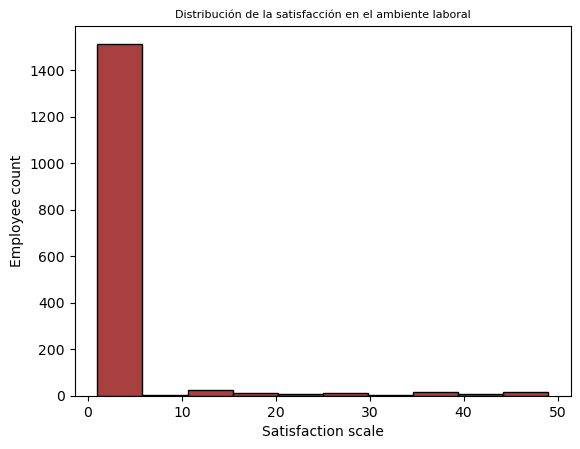

In [14]:
#Cómo se distribuye la satisfacción con el ambiente 

sns.histplot(data=df, x='env_sat_rate', bins=10, kde=False, color='darkred')
plt.title('Distribución de la satisfacción en el ambiente laboral', fontsize = 8)
plt.xlabel('Satisfaction scale')
plt.ylabel('Employee count');

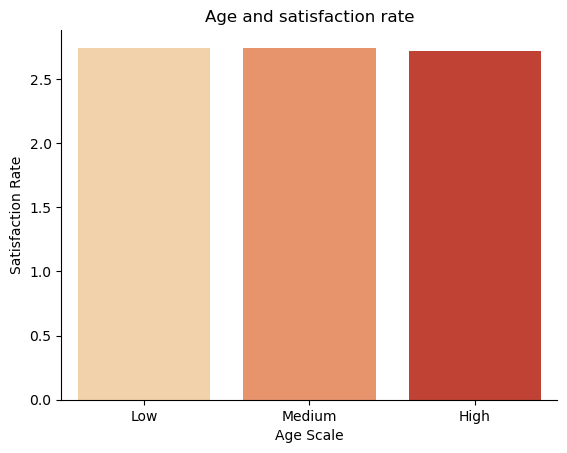

In [15]:
df['age_scale'] = pd.cut(df['age'],bins = 3, labels= ['Low', 'Medium', 'High'])
sns.barplot(data=df, y='job_sat_rate',
            x='age_scale',
            palette= 'OrRd',
            ci=False)
plt.title("Age and satisfaction rate")
plt.ylabel("Satisfaction Rate")
plt.xlabel("Age Scale")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

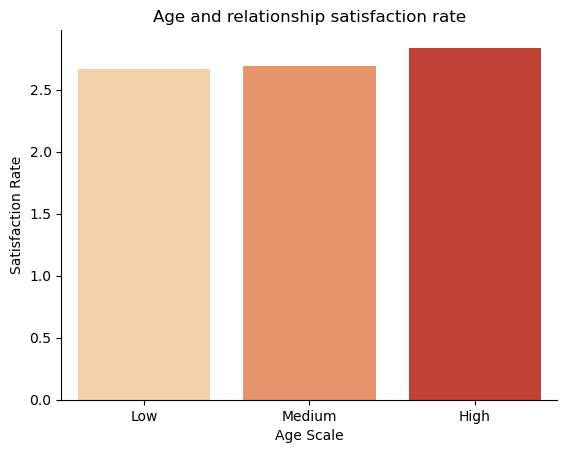

In [16]:
df['age_scale'] = pd.cut(df['age'],bins = 3, labels= ['Low', 'Medium', 'High'])
sns.barplot(data=df, y='relationship_sat_rate',
            x='age_scale',
            palette= 'OrRd',
            ci=False)
plt.title("Age and relationship satisfaction rate")
plt.ylabel("Satisfaction Rate")
plt.xlabel("Age Scale")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

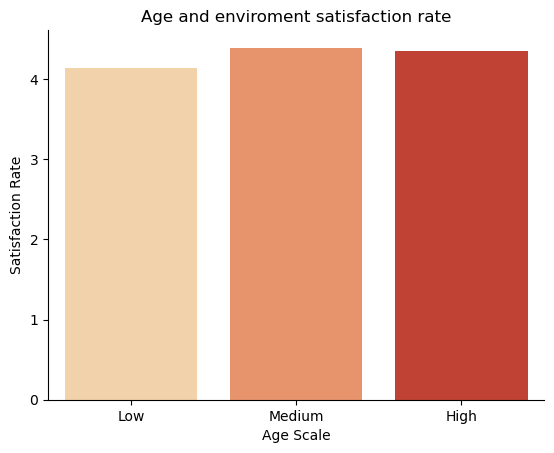

In [ ]:
df['age_scale'] = pd.cut(df['age'],bins = 3, labels= ['Low', 'Medium', 'High'])
sns.barplot(data=df, y='env_sat_rate',
            x='age_scale',
            palette= 'OrRd',
            ci=False)
plt.title("Age and enviroment satisfaction rate")
plt.ylabel("Satisfaction Rate")
plt.xlabel("Age Scale")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

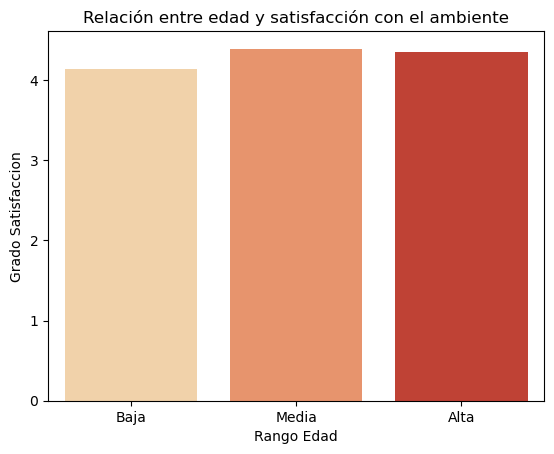

In [17]:
df['age_scale'] = pd.cut(df['age'],bins = 3, labels= ['Baja', 'Media', 'Alta'])
sns.barplot(data=df, y='env_sat_rate',
            x='age_scale',
            palette= 'OrRd',
            ci=False)
plt.title("Relación entre edad y satisfacción con el ambiente")
plt.ylabel("Grado Satisfaccion")
plt.xlabel("Rango Edad");

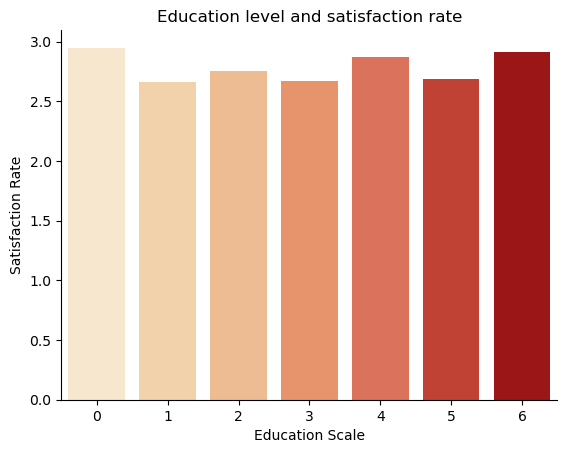

In [18]:
df['age_scale'] = pd.cut(df['age'],bins = 3, labels= ['Low', 'Medium', 'High'])
sns.barplot(data=df, y='job_sat_rate',
            x='traning_times_last_year',
            palette= 'OrRd',
            ci=False)
plt.title("Education level and satisfaction rate")
plt.ylabel("Satisfaction Rate")
plt.xlabel("Education Scale")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

In [ ]:
df.columns

Index(['employee_number', 'gender', 'birth_year', 'age', 'marital_status',
       'dist_home', 'job_title', 'department', 'departured', 'year_at_comp',
       'standard_hours', 'remote', 'business_travel', 'over_time', 'job_level',
       'stock_opt_level', 'traning_times_last_year', 'perf_rate',
       'year_last_promotion', 'year_current_mngr', 'education_field',
       'education_scale', 'annual_salary', 'monthly_income', 'daily_rate',
       'perc_salary_hike', 'env_sat_rate', 'job_involvement', 'job_sat_rate',
       'relationship_sat_rate', 'work_life_balance', 'num_comp_worked',
       'tot_working_year', 'age_scale'],
      dtype='object')

In [19]:
df['departured'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['salary_scale'] = pd.cut(df['annual_salary'],bins = 3, labels= ['Low', 'Medium', 'High'])


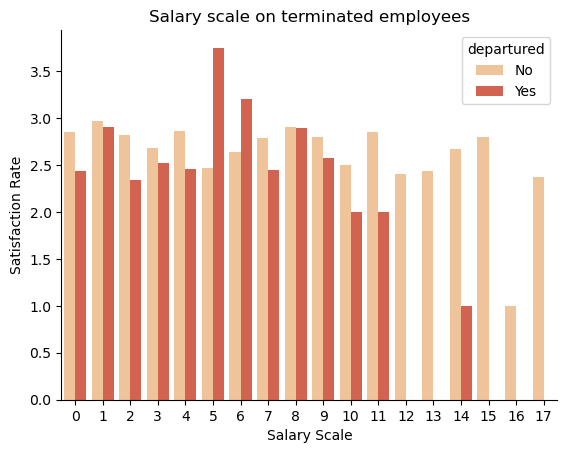

In [21]:


sns.barplot(data=df, y='job_sat_rate',
            x='year_current_mngr',
            hue='departured',
            palette= 'OrRd',
            ci=False)
plt.title("Salary scale on terminated employees")
plt.ylabel("Satisfaction Rate")
plt.xlabel("Salary Scale")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

In [ ]:
df['year_current_mngr'].unique()

array([15,  9,  6,  8,  7, 11, 10, 12,  4,  0,  5, 17,  2, 14,  1, 13,  3,
       16], dtype=int64)

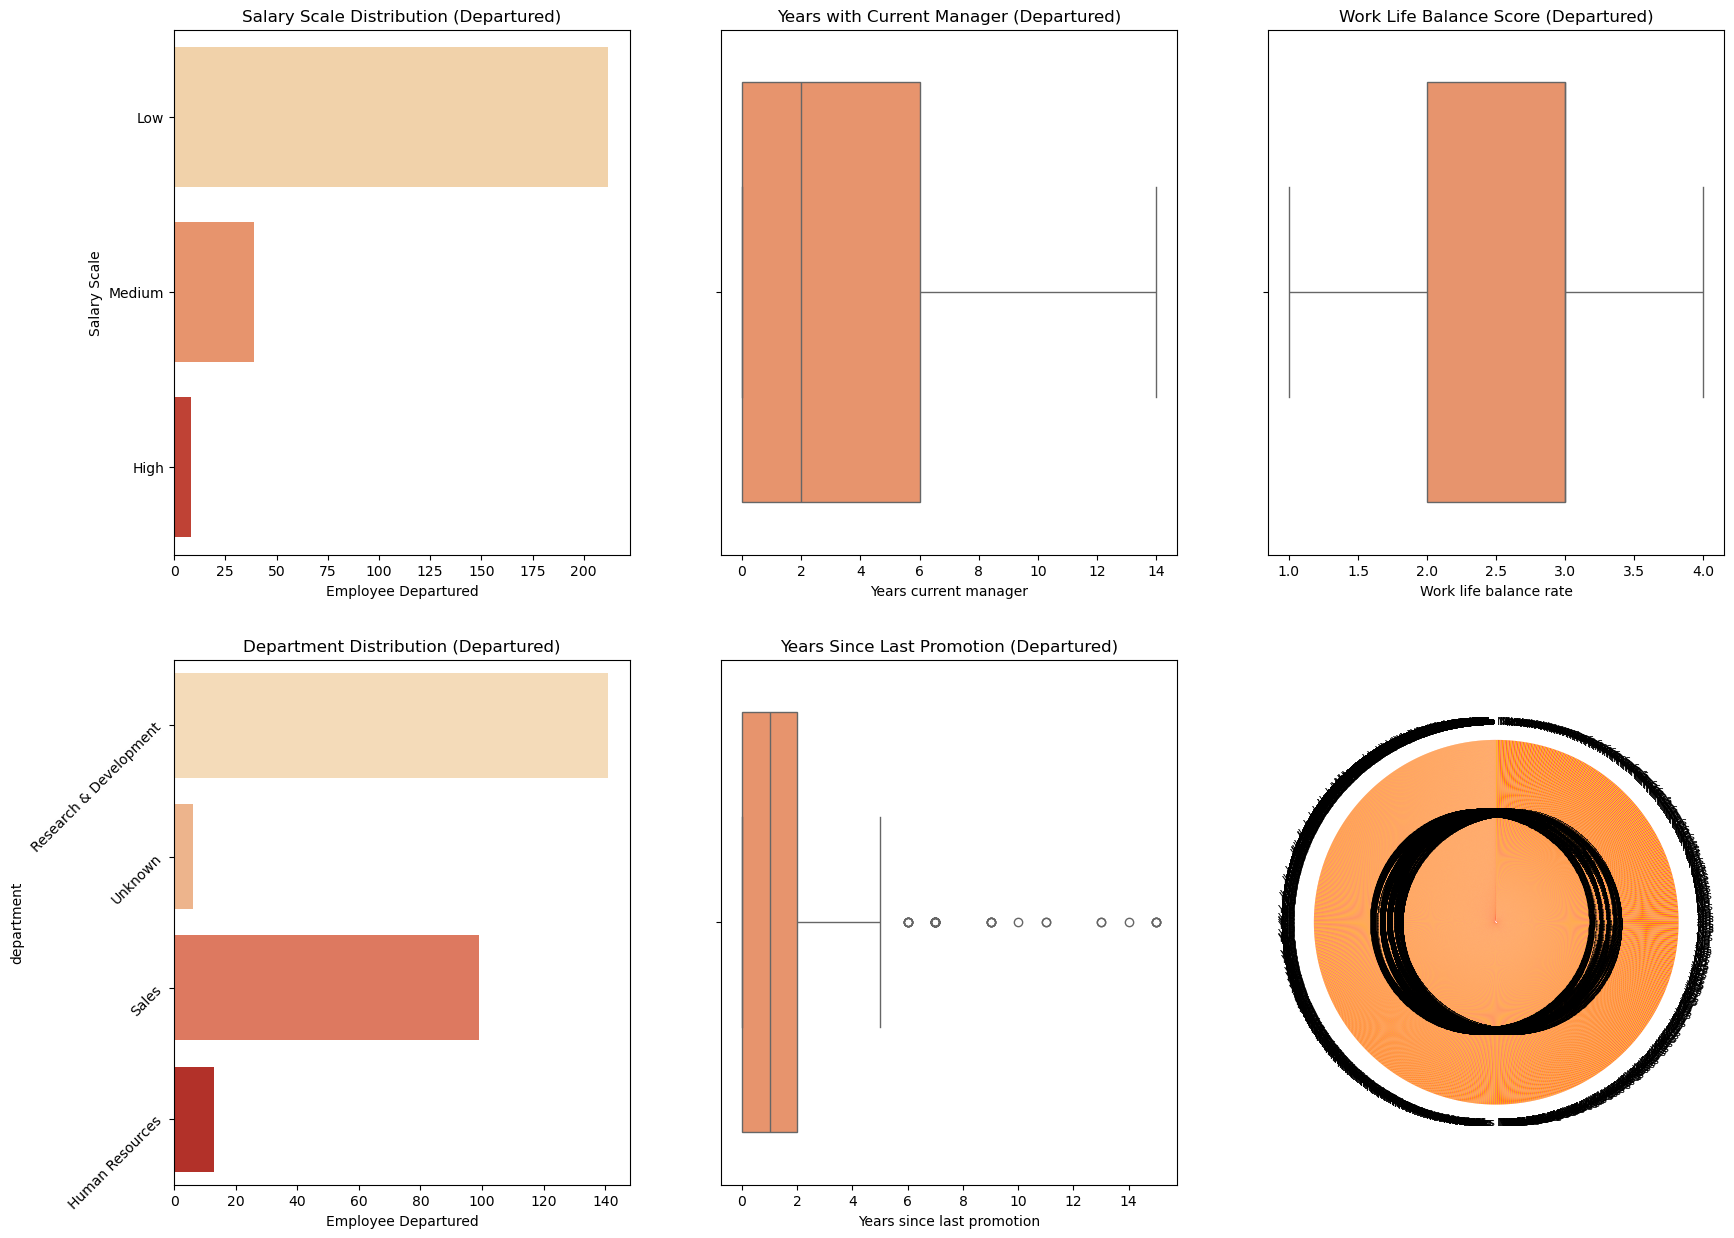

In [22]:
df['current_mngr'] = pd.cut(df['year_current_mngr'],bins = 4, labels= ['0-5', '6-10', '11-15', '16-20'])
yes_df = df[df['departured'] == 'Yes']
fig, axes = plt.subplots(2, 3, figsize=(20, 15))  # 2 rows x 3 columns
#PLOT 1
sns.countplot(data=yes_df,
              y='salary_scale',
              ax=axes[0, 0],
              palette='OrRd')
axes[0, 0].set_title('Salary Scale Distribution (Departured)')
axes[0, 0].set_xlabel('Employee Departured')
axes[0, 0].set_ylabel('Salary Scale')
#PLOT 2
sns.countplot(data=yes_df,
              y='department',
              ax=axes[1, 0],
              palette='OrRd')
axes[1, 0].set_title('Department Distribution (Departured)')
axes[1, 0].tick_params(axis='y', rotation=45)
axes[1, 0].set_xlabel('Employee Departured')
# PLOT 3
sns.boxplot(data=yes_df,
            x='year_current_mngr',
            ax=axes[0, 1],
            palette='OrRd')
axes[0, 1].set_title('Years with Current Manager (Departured)')
axes[0, 1].tick_params(axis='y', rotation=45)
axes[0, 1].set_xlabel('Years current manager')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='y', rotation=90)
#PLOT 4
sns.boxplot(data=yes_df, x='year_last_promotion',
            ax=axes[1, 1],
            palette='OrRd')
axes[1, 1].set_title('Years Since Last Promotion (Departured)')
axes[1, 1].tick_params(axis='y', rotation=90)
axes[1, 1].set_ylabel(' ')
axes[1, 1].set_xlabel('Years since last promotion')
#PLOT 5
sns.boxplot(data=yes_df, x='work_life_balance',
            ax=axes[0, 2],
            palette='OrRd')
axes[0, 2].set_title('Work Life Balance Score (Departured)')
axes[0, 2].set_ylabel('')
axes[0, 2].tick_params(axis='y', rotation=90)
axes[0, 2].set_xlabel('Work life balance rate')
#PLOT 6
plt.pie('employee_number', labels='departured', data=df, autopct = '%1.2f%%', colors=['tomato', 'orange'], startangle=90, textprops={'fontsize': 8});


#sns.histplot(data=df,
              #x='departured',
              #ax=axes[1, 2],
              #color='tomato')
#axes[1, 2].set_title('Department Distribution (Departured)')
#axes[1, 2].tick_params(axis='y', rotation=45)
#axes[1, 2].set_xlabel('Employee Departured')





